In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


##### employees with low satisafaction level likely to leave firm
##### If the average_montly_hours are more, employees are likely to leave firm
##### More the time spend on workplace, less the chance of employee to sustain
##### Promotions help employees to keep adheared to their job..

#### correspondance of satisfaction level wrt the sustainibility of employee

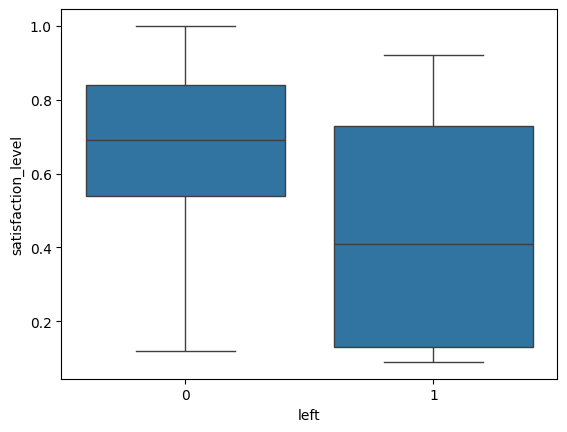

In [8]:
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.show()

#### correspondance of time spend in company wrt the sustainibility of employee

In [71]:
df1 = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary', 'left']]
df1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1


In [72]:
dummies = pd.get_dummies(df1, 'salary', drop_first=True)
dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_low,salary_medium
0,0.38,157,0,1,True,False
1,0.80,262,0,1,False,True
2,0.11,272,0,1,False,True
3,0.72,223,0,1,True,False
4,0.37,159,0,1,True,False
...,...,...,...,...,...,...
14994,0.40,151,0,1,True,False
14995,0.37,160,0,1,True,False
14996,0.37,143,0,1,True,False
14997,0.11,280,0,1,True,False


In [73]:
df2 = dummies

In [76]:
X = df2.drop('left', axis='columns')
y = df2.left

In [88]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
model = LogisticRegression()

In [122]:
model.fit(X_train, y_train)

LogisticRegression()

In [123]:
model.score(X_test, y_test)

0.7816666666666666

In [125]:
y_pred = model.predict(X_test)

In [128]:
from sklearn.metrics import classification_report, log_loss

In [132]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
print(report_df)

              precision    recall  f1-score      support
0              0.804769  0.942820  0.868342  2291.000000
1              0.585443  0.260931  0.360976   709.000000
accuracy       0.781667  0.781667  0.781667     0.781667
macro avg      0.695106  0.601875  0.614659  3000.000000
weighted avg   0.752935  0.781667  0.748434  3000.000000


In [135]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.05755686, 0.4135747 , 0.33875972, ..., 0.1046929 , 0.29308721,
       0.50839396])

In [141]:
loss = log_loss(y_test, y_pred_prob)

In [142]:
loss

0.45541203600821956